In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

import bridgestone as b

from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.metrics import mean_squared_error

/Users/jordannieusma/miniconda3/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
#%cd ..

/Users/jordannieusma/Documents/Documents-Laptop/GitHub


In [4]:
# Read-in data
sales = pd.read_csv("final_sales.csv", parse_dates=["DATE"], 
                    usecols=["ARTICLE_ID","DATE","STORE_ID","UNITS","SALES"], 
                    dtype={"ARTICLE_ID":int,
                           "STORE_ID":int,
                           "UNITS":np.float64,
                           "SALES":np.float64},
                    low_memory=False)


In [5]:
# Sort
sales.sort_values(by=["DATE","ARTICLE_ID"], inplace=True)

# Group the rows by ARTICLE_ID and month of DATE, and sum the UNITS values
temp = sales.groupby(['ARTICLE_ID', pd.Grouper(key='DATE', freq='M')])['UNITS'].sum().reset_index()
temp["DATE"] = pd.to_datetime(temp["DATE"])
grouped_sales = temp.set_index("DATE")

print(sales.shape)
print(grouped_sales.shape)

(13499278, 5)
(16040, 2)


In [10]:
temp = pd.read_csv("product.csv", sep="|")
prods = temp[temp["CATEGORY_CODE"].isin([44.0, 26.0])]
print("Data loaded: products")

stores = pd.read_csv("store.csv", sep="|", usecols=["STORE_ID", "STATE_CODE", "ZIP_CODE"])
print("Data loaded: stores")

indivs = pd.read_csv("individual.csv")
print("Data loaded: individuals")

vehicles = pd.read_csv("vehicle.csv", sep="|")
print("Data loaded: vehicles")

Data loaded: products
Data loaded: stores
Data loaded: individuals
Data loaded: vehicles


In [11]:
print("Shape stores file: ", stores.shape)
print("Shape products file: ", prods.shape)
print("Shape products file: ", indivs.shape)
print("Shape products file: ", vehicles.shape)

Shape stores file:  (2814, 3)
Shape products file:  (32563, 13)
Shape products file:  (16834962, 4)
Shape products file:  (27854109, 5)


In [8]:
b.compute_quarterly_regression(grouped_sales)

,Q2-2015,Q3-2015,Q4-2015,Q1-2016,Q2-2016,Q3-2016,Q4-2016,Q1-2017,Q2-2017,Q3-2017,Q4-2017,Q1-2018,Q2-2018,Q3-2018
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.763526,13.435686
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.836080,5.934558,3.483698,1.050520
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.881942,4.831803,5.426370,-0.675923
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.068793,5.099311,2.235220,1.354891
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.624507,4.207094,-1.523110,0.383467,1.130061,3.856145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7099715,-0.081333,3.289502,-4.756718,6.271751,1.254568,-1.284665,-3.115371,4.941447,-1.852383,-5.095665,-5.656216,7.533295,8.509674,-10.071659
7099716,1.262809,3.770692,-6.445718,10.282303,-0.406843,3.052848,2.280724,8.200344,4.038696,5.399857,-4.429774,6.882319,-0.116804,-14.790756
7099717,-0.247223,-0.778753,-5.869760,13.476675,3.836080,-0.580079,3.342888,20.350746,5.326765,2.794697,-2.022931,10.519518,1.350949,-1.123791
7099718,2.343604,-3.871910,-8.201541,14.019993,1.274095,-2.797384,10.759047,14.323192,11.378717,4.868327,-2.111071,25.393800,11.306700,-46.094769


In [12]:
print(sales["UNITS"].sum())
print(sales["SALES"].sum())

30299003.0
3131326703.2300005


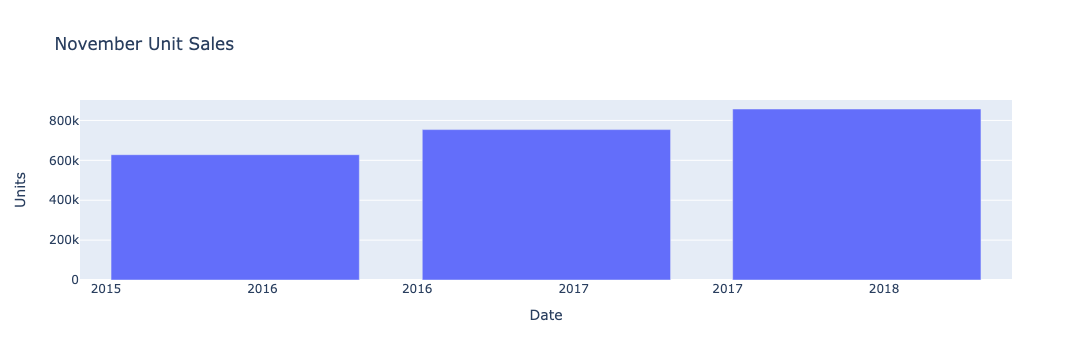

In [44]:
# Group the rows by ARTICLE_ID and month of DATE, and sum the UNITS values
temp = sales.groupby([pd.Grouper(key='DATE', freq='M')])['UNITS'].sum().reset_index()
temp["DATE"] = pd.to_datetime(temp["DATE"])
grouped_sales = temp.set_index("DATE")
november_data = grouped_sales.loc[grouped_sales.index.month == 11]
november_data

# Create a bar plot of the "UNITS" column using Plotly
fig = go.Figure(data=[go.Bar(x=november_data.index, y=november_data['UNITS'])])

# Customize the x-axis labels
fig.update_xaxes(
    tickformat='%Y',  # format string
    title_text='Year'  # X-axis title
)

# Customize the y-axis labels
fig.update_yaxes(title_text='Units')  # Y-axis title

# Add a title to the plot
fig.update_layout(title_text='November Unit Sales')

# Show the plot
fig.show()

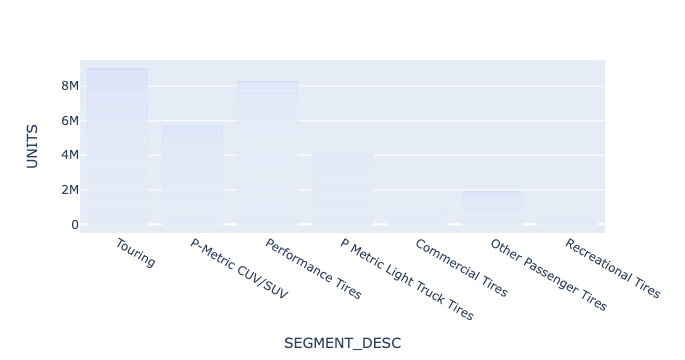

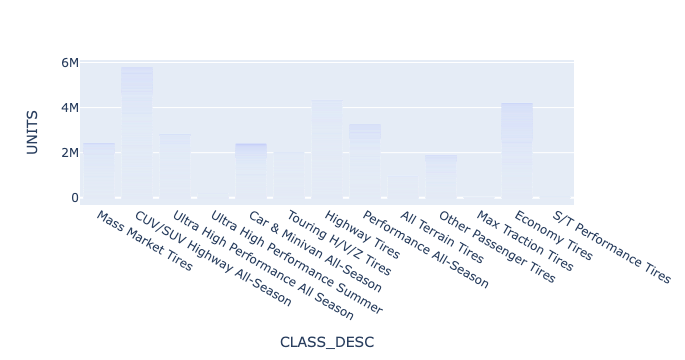

In [82]:
temp = grouped_sales.reset_index()
temp_merged = pd.merge(temp, prods, on="ARTICLE_ID")[["DATE","ARTICLE_ID","UNITS","CATEGORY_DESC","SEGMENT_DESC","CLASS_DESC"]]
temp_merged = temp_merged[["UNITS","CATEGORY_DESC","SEGMENT_DESC","CLASS_DESC"]]
temp_totals = temp_merged.groupby(["UNITS","SEGMENT_DESC","CLASS_DESC"], as_index=False)["UNITS"].sum()
temp_totals

fig = px.bar(temp_totals, x='SEGMENT_DESC', y='UNITS')
fig.show()

fig = px.bar(temp_totals, x='CLASS_DESC', y='UNITS')
fig.show()
